<a href="https://colab.research.google.com/github/andryasilvestre/Data-Science-Senac/blob/master/Projeto_LEITOS_2020_2023ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto -> Análise de dados com Python (Dados abertos do Governo)


**Leitos 2020 - 2023 (Ministério da Saúde)**

* Sabemos que devido a intensidade da pandemia, o número de hospitais e leitos cresceu bastante para atender a totalidade da população que estava doente.
Inicialmente, somos capazes de inferir, através da experiência que o número de hospitais e leitos cresceram gradativamente até o pico da pandemia (o mais lógico) e diminuíram gradativamente a medida em que os sintomas/totalidade de pessoas doentes foram diminuindo, já com a introdução das vacinas etc.

* Dados externos que podemos contabilizar:
  * Em janeiro de 2021, as primeira dose da vacina foi ministrada. Nesse período, o Brasil registrava aproximadamente 210 mil mortes por COVID-19, mas apenas a partir de março de 2021 que começamos a notar um crescimento exponencial.
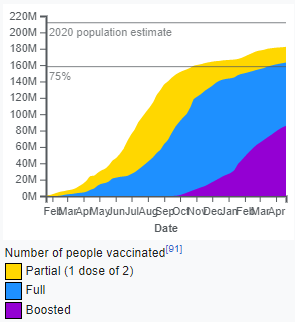
  * (gráfico retirado de: https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Brazil)



* Além disso, verificamos que o maior pico de casos de COVID se deu no início de 2022, entre os meses de Janeiro e Fevereiro. Nesse sentido, poderiamos tentar supor, logicamente que o número de hospitais e leitos devem aumentar drasticamente para atender essas pessoas:
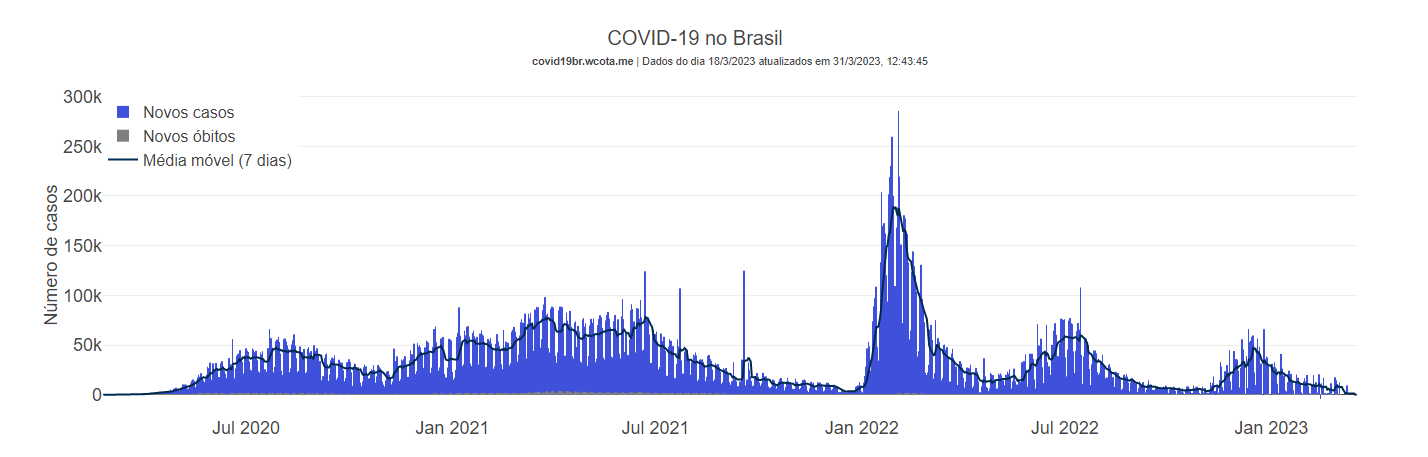

* gráfico retirado de https://covid19br.wcota.me/#grafico


* **Mas o quanto que o correlacionamento desses dados se justificam na prática?**

> Dando início a análise, foram unificados 4 arquivos disponíveis no Portal de Dados Abertos do Governo Federal (https://dados.gov.br/home) em um único arquivo;

> Além disso, foi convertida a coluna **COMP** duas: ANO e MES, afim de facilitar a análise, conforme imagem abaixo:
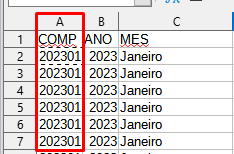

> Também foi realizada a conversão da coluna **TP_GESTAO**:
>> 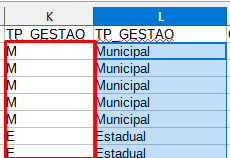

A referência  utilizada para os parâmetros acima pode ser encontrada em: https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos_SUS/Dicionário_Leito_hospitalar.pdf

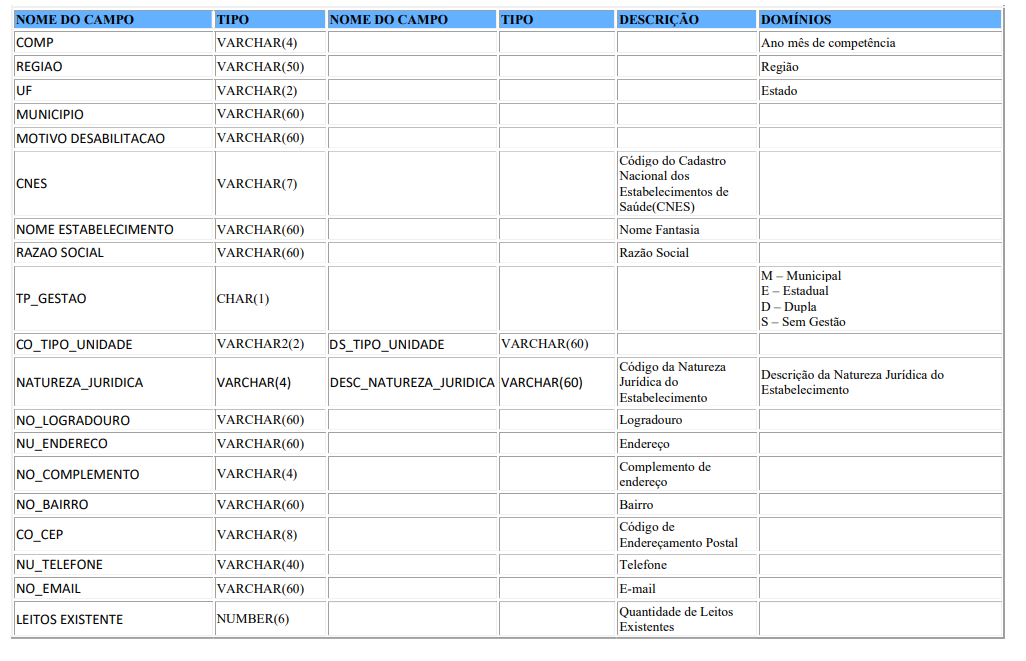

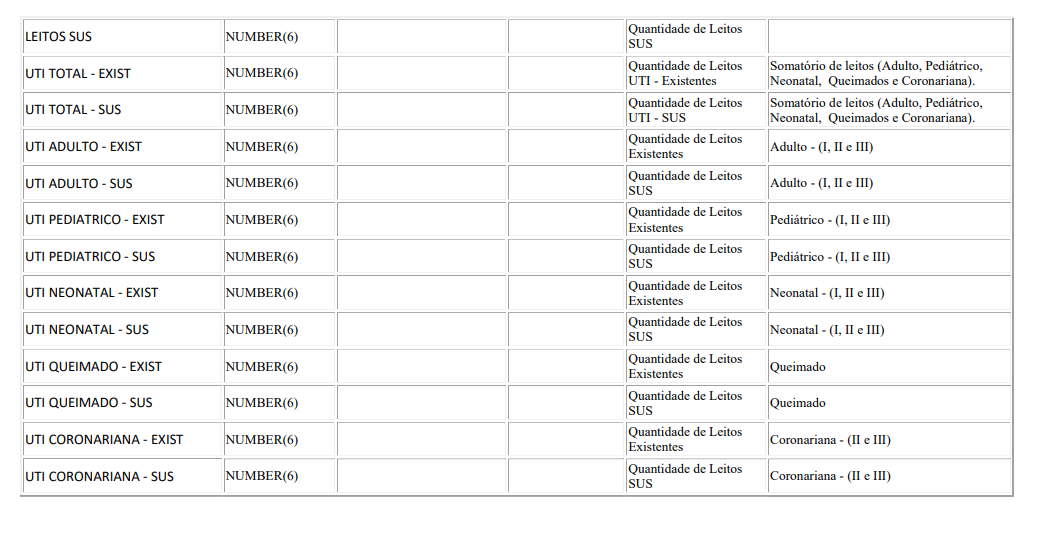

In [ ]:
from google.colab import files
import io
from datetime import datetime


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


> Importação e leitura dos dados CSV

In [33]:
df = pd.read_csv('/content/DSLeitos_2019-2023.csv', encoding='ISO-8859-1')


<ipython-input-33-27386c68bba1>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/DSLeitos_2019-2023.csv', encoding='ISO-8859-1')


In [34]:
df.head()

,ANO,MES,REGIAO,UF,MUNICIPIO,MOTIVO DESABILITACAO,CNES,NOME ESTABELECIMENTO,RAZAO SOCIAL,TP_GESTAO,...,UTI PEDIATRICO - EXIST,UTI PEDIATRICO - SUS,UTI NEONATAL - EXIST,UTI NEONATAL - SUS,UTI QUEIMADO - EXIST,UTI QUEIMADO - SUS,UTI CORONARIANA - EXIST,UTI CORONARIANA - SUS,Unnamed: 35,Unnamed: 36
0,2023,Janeiro,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,Municipal,...,0,0,0,0,0,0,0,0,NaN,NaN
1,2023,Janeiro,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,35,HOSPITAL MENDO SAMPAIO,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,Municipal,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2023,Janeiro,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,94,MATERNIDADE PADRE GERALDO LEITE BASTOS,PREFEITURA MUNICIPAL DO CABO DE SANTO AGOSTINHO,Municipal,...,0,0,0,0,0,0,0,0,NaN,NaN
3,2023,Janeiro,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,183,HOSPITAL SAMARITANO,SOCIEDADE HOSPITALAR SAMARITANO LTDA,Municipal,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2023,Janeiro,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,221,HOSPITAL SAO SEBASTIAO,CASA DE SAUDE E MATERNIDADE SAO SEBASTIAO LTDA,Municipal,...,0,0,0,0,0,0,0,0,NaN,NaN


In [26]:
df.shape

(343130, 36)

In [36]:
print('A base de dados tem {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

A base de dados tem 343130 linhas e 37 colunas.


A base de dados tem **343130** **linhas** e **37 colunas**.


Pegando os valores únicos para Ano e Mês:

In [44]:
ano = df['ANO'].tolist()
unicos_ano = list(set(ano))
unicos_ano

[2019, 2020, 2021, 2022, 2023]

In [51]:
mes = df['MES'].tolist()
unicos_mes = list(set(mes))
unicos_mes

['Janeiro',
 'Abril',
 'Outubro',
 'Agosto',
 'Julho',
 'Junho',
 'Setembro',
 'Fevereiro',
 'Maio',
 'Dezembro',
 'Março',
 'Novembro']

Extrair quantidade de hospitais por ano

In [87]:
hospitais_por_ano = df.groupby('ANO')['NOME ESTABELECIMENTO'].count()
hospitais_por_ano

ANO
2019    81559
2020    83412
2021    85783
2022    85313
2023     7063
Name: NOME ESTABELECIMENTO, dtype: int64

In [72]:
quantidade_hp_ano2019 = hospitais_por_ano.loc[2019]
quantidade_hp_ano2020 = hospitais_por_ano.loc[2020]
quantidade_hp_ano2021 = hospitais_por_ano.loc[2021]
quantidade_hp_ano2022 = hospitais_por_ano.loc[2022]
quantidade_hp_ano2023 = hospitais_por_ano.loc[2023]

quantidade_hp_ano = list[quantidade_hp_ano2019, quantidade_hp_ano2020, quantidade_hp_ano2021, quantidade_hp_ano2022, quantidade_hp_ano2023]
quantidade_hp_ano

list[81559, 83412, 85783, 85313, 7063]

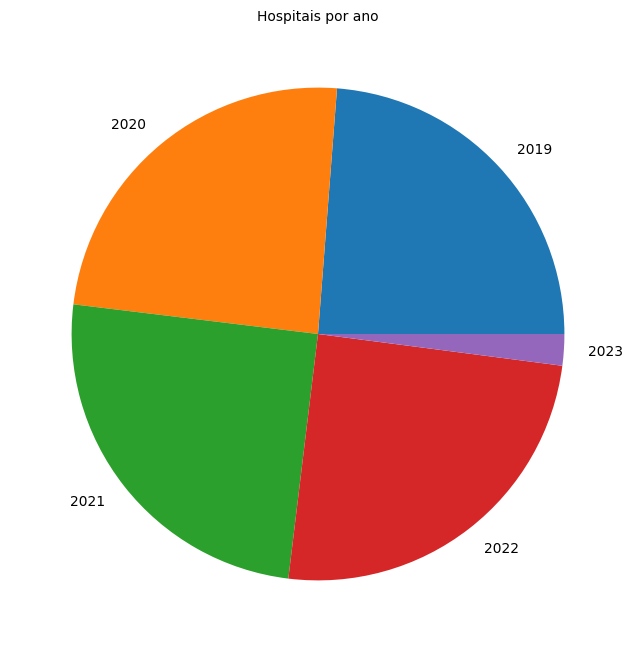

In [100]:
graph_1 = hospitais_por_ano.head(5).plot(kind='pie', ylabel = '', xlabel = 'Hospitais por ano')
graph_1.set_xlabel('Hospitais por ano')
graph_1.xaxis.set_label_position('top')

É notório que a diferença não é grande exceto para a de 2023. Entretanto, o ano não acabou ainda e a nossa base de dados disponibiliza os hospitais até o mês de Janeiro, o qual podemos predizer que deve corresponder a 1/12 da quantidade anual/média dos outros anos.

*  Se considerarmos o seguinte: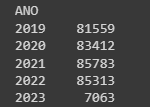, temos que a média anual da nossa base (2019, 2020, 2021 e 2022), com exceção do ano de 2023 é dada por:

In [104]:
somatorio_anual_hp = quantidade_hp_ano2019 + quantidade_hp_ano2020 + quantidade_hp_ano2021 + quantidade_hp_ano2022
media_ano = somatorio_anual_hp / 4
media_ano

84016.75

E em 2023, foram registrados 7063 para o mês de Janeiro (aproximadamente 1/12 do esperado por ano), então:

In [105]:
estimativa_hp_2023 = 7063 * 12
estimativa_hp_2023

84756

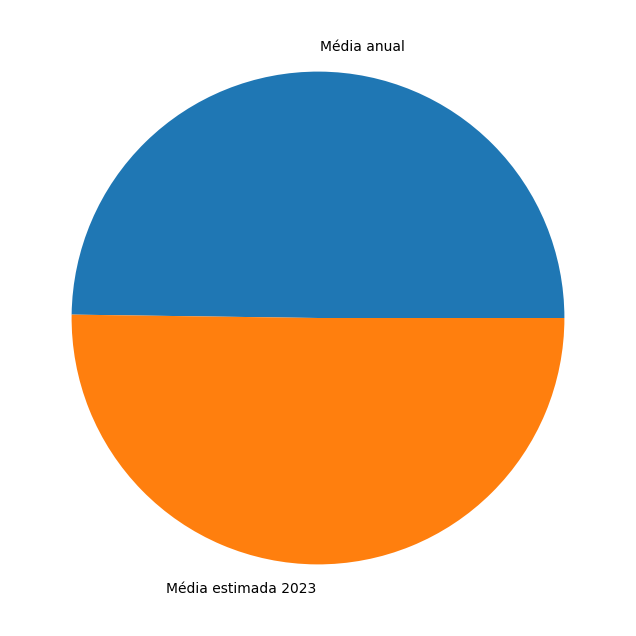

In [108]:
valores_ano = [media_ano, estimativa_hp_2023]
labels_ano = ['Média anual', 'Média estimada 2023']

plt.pie(valores_ano, labels=labels_ano)
plt.show()


Bem equilibrado; então o que podemos verificar?

* Estudando as colunas, percebemos que há colunas relacionadas a quantidade de leitos e UTIs (adulto, neonatal, coronarianas etc);

* Podemos também verificar como está a distribuição desses hospitais/leitos por região/estado;
